In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
%matplotlib inline

In [2]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
print('data shape: {0}; no. positive: {1};no. negative: {2}'.format(X.shape,y[y==1].shape,y[y==0].shape))
print(cancer.data[0])

data shape: (569, 30); no. positive: (357,);no. negative: (212,)
[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]


In [3]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2)

In [5]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

train_score = model.score(X_train,y_train)
test_score = model.score(X_test,y_test)

print('train score:{:.6f}; test score: {:.6f}'.format(train_score,test_score))

train score:0.958242; test score: 0.956140


/home/program/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [6]:
y_pred = model.predict(X_test)

print('matchs: {0}/{1}'.format(np.equal(y_pred,y_test).shape[0], y_test.shape[0]))

matchs: 114/114


In [7]:
y_pred_proba = model.predict_proba(X_test)
print('sample of predict probability: {0}'.format(y_pred_proba[0]))

y_pred_proba_0 = y_pred_proba[:,0] > 0.1
result = y_pred_proba[y_pred_proba_0]

y_pred_proba_1 = result[:,1] > 0.1
print(result[y_pred_proba_1])

sample of predict probability: [0.03372755 0.96627245]
[[0.17670486 0.82329514]
 [0.48910227 0.51089773]
 [0.87985463 0.12014537]
 [0.87456331 0.12543669]
 [0.55891488 0.44108512]
 [0.14810554 0.85189446]
 [0.63355135 0.36644865]
 [0.40547667 0.59452333]
 [0.58095187 0.41904813]
 [0.11218924 0.88781076]
 [0.64946945 0.35053055]
 [0.1583756  0.8416244 ]
 [0.85870043 0.14129957]
 [0.12853022 0.87146978]]


# 模型优化

In [27]:
import time
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

def polynomial_moel(degree=1, **kwarg):
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    logistic_regression = LogisticRegression(**kwarg)
    
    pipeline = Pipeline([('polynomial_features',polynomial_features),('logistic_regression',logistic_regression)])
    
    return pipeline
    

In [23]:
model = polynomial_moel(degree=2, penalty='l1')
start = time.process_time()
model.fit(X_train,y_train)

train_score = model.score(X_train,y_train)

cv_score = model.score(X_test,y_test)

print('elaspe: {0:.6f}; train_score: {1:.6f}; cv_score: {2:.6f}'.format(time.process_time()-start,train_score,cv_score))



elaspe: 0.233115; train_score: 0.993407; cv_score: 0.982456


In [10]:
logistic_regression = model.named_steps['logistic_regression']
print('model parameter shape: {0}; count of non-zero element: {1}'.format(
    logistic_regression.coef_.shape,np.count_nonzero(logistic_regression.coef_)))

model parameter shape: (1, 495); count of non-zero element: 111


## 学习曲线

In [14]:
from common.utils import plot_learning_curve # 外部包

elaspe: 48.757018


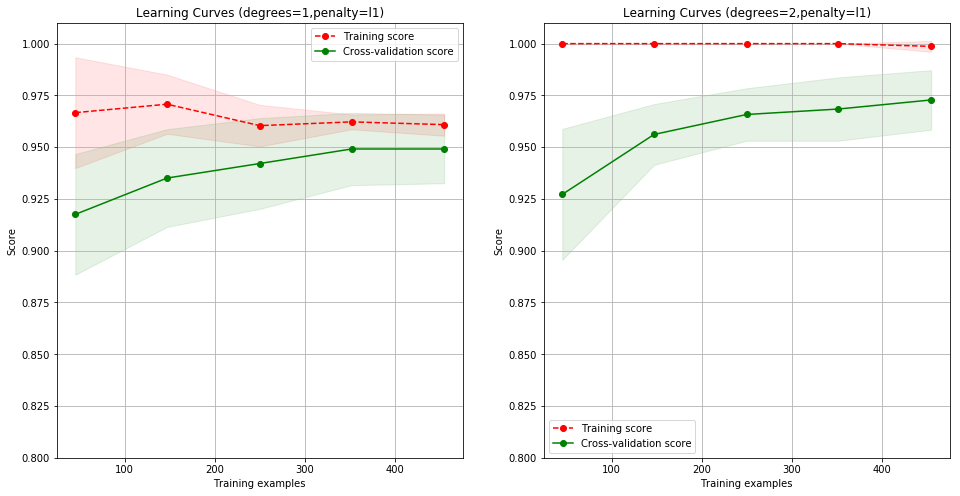

In [28]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=10,test_size=.2,random_state=0)
title='Learning Curves (degrees={0},penalty={1})'
degrees=[1,2]
penalty = 'l1'
start=time.process_time()
plt.figure(figsize=(16,8))

for i in range(len(degrees)):
    plt.subplot(1,len(degrees),i+1)
    plot_learning_curve(plt,
                       polynomial_moel(degree=degrees[i], penalty=penalty,solver='liblinear', max_iter=10000),    
                       title.format(degrees[i],penalty),
                        X,y,
                        ylim=(.8,1.01),
                        cv=cv)
print('elaspe: {0:.6f}'.format(time.process_time()-start))

/home/program/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/program/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/program/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/program/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/home/program/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number 

elaspe: 883.735517


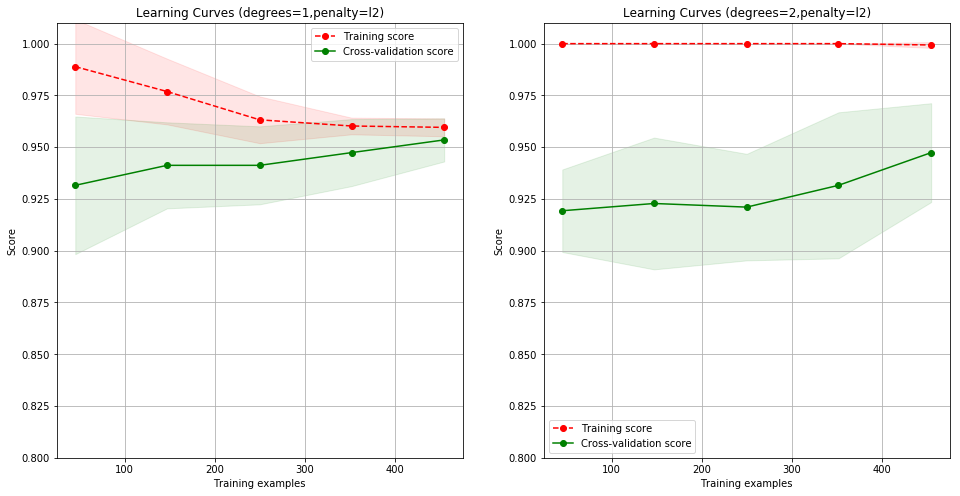

In [32]:
penalty = 'l2'
start=time.process_time()
plt.figure(figsize=(16,8))

for i in range(len(degrees)):
    plt.subplot(1,len(degrees),i+1)
    plot_learning_curve(plt,
                       polynomial_moel(degree=degrees[i], penalty=penalty,solver='lbfgs', max_iter=1000000),    
                       title.format(degrees[i],penalty),
                        X,y,
                        ylim=(.8,1.01),
                        cv=cv)
print('elaspe: {0:.6f}'.format(time.process_time()-start))